Saving adult_with_headers.csv to C:/Users\Asad shaikh/Documents/adult_with_headers.csv/adult_with_headers (4).csv
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6

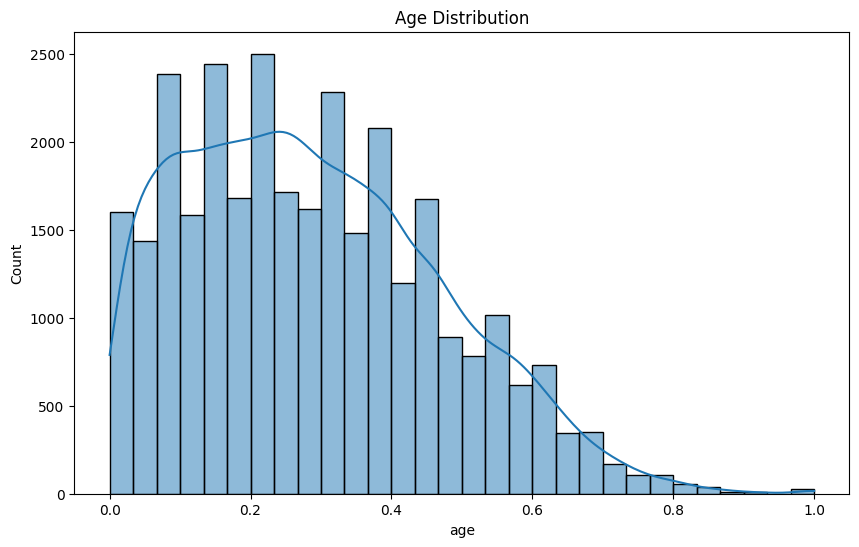

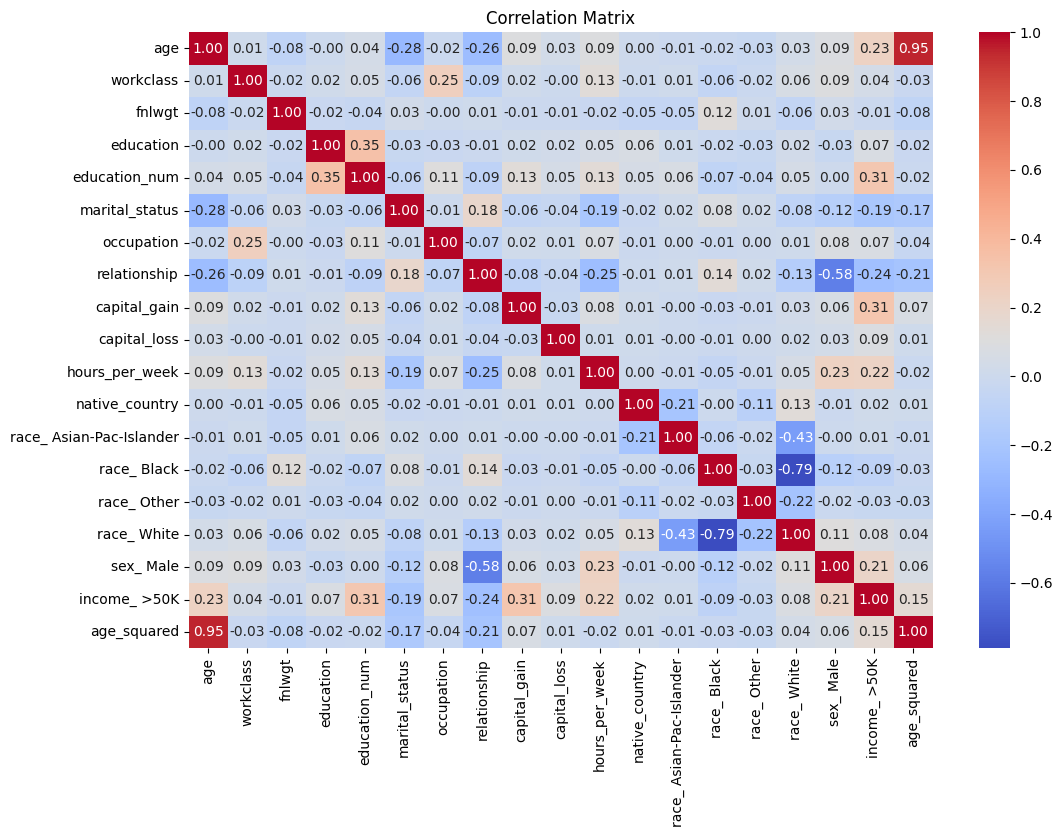

In [ ]:
from google.colab import files
uploaded = files.upload("C:/Users\Asad shaikh/Documents/adult_with_headers.csv")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import IsolationForest
import warnings

warnings.filterwarnings("ignore")

# Install ppscore if not installed
try:
    import ppscore as pps
except ModuleNotFoundError:
    import subprocess
    subprocess.check_call(["pip", "install", "ppscore"])
    import ppscore as pps

# Load the dataset
df = pd.read_csv("/content/C:/Users\Asad shaikh/Documents/adult_with_headers.csv/adult_with_headers.csv")

# Data Exploration
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Handling Missing Values
df.dropna(inplace=True)

# Feature Scaling
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

minmax_scaler = MinMaxScaler()
df[numeric_features] = minmax_scaler.fit_transform(df[numeric_features])

# Encoding Categorical Variables
categorical_features = df.select_dtypes(include=["object"]).columns
for col in categorical_features:
    if df[col].nunique() > 5:
        df[col] = LabelEncoder().fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)
# Feature Engineering
if "income" in df.columns:
    df["income_binary"] = (df["income"].str.strip() == ">50K").astype(int)
df["age_squared"] = df["age"] ** 2

# Feature Selection - Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df[numeric_features])
df = df[outliers == 1]

# Feature Selection - PPS Score
pps_matrix = pps.matrix(df)
print("PPS Score Matrix:")
print(pps_matrix)

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df["age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
